<a href="https://colab.research.google.com/github/JakeOh/202105_itw_bd26/blob/main/lab_da/da07_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모듈 import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# mpg 데이터 셋

In [2]:
mpg = sns.load_dataset('mpg')

In [3]:
mpg.info()
# data type, (row) index, columns, memory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
mpg.head()  # mpg.iloc[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
mpg.iloc[-5:]  # mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [6]:
mpg.shape

(398, 9)

In [7]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [8]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [9]:
mpg['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [10]:
mpg['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [11]:
mpg['name'].value_counts()

ford pinto                     6
toyota corolla                 5
ford maverick                  5
amc matador                    5
toyota corona                  4
                              ..
dodge colt hatchback custom    1
dodge st. regis                1
toyota corolla 1600 (sw)       1
honda civic 1500 gl            1
chevy s-10                     1
Name: name, Length: 305, dtype: int64

* 2개의 연속형 변수 간의 상관 관계: scatter plot
    * mpg(연비) ~ displacement(배기량) scatter plot
    * 2x2 Subplot들을 생성
        * mpg ~ cylinder scatter
        * mpg ~ horsepower scatter
        * mpg ~ weight scatter
        * mpg ~ acceleration scatter

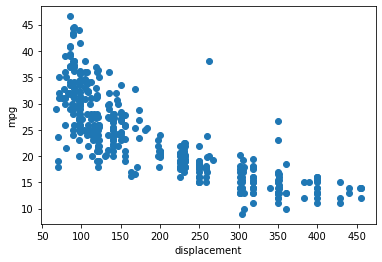

In [14]:
# mpg ~ displacement
plt.scatter(x='displacement', y='mpg', data=mpg)
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.show()

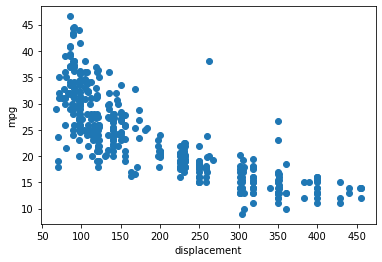

In [18]:
plt.plot('displacement', 'mpg', data=mpg, marker='o', linestyle='')
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.show()

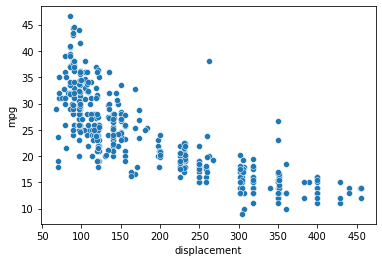

In [19]:
sns.scatterplot(x='displacement', y='mpg', data=mpg)
plt.show()

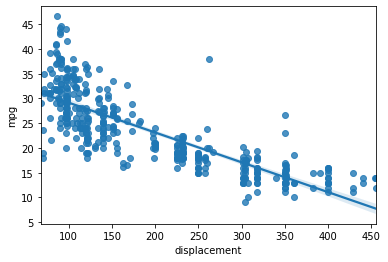

In [20]:
sns.regplot(x='displacement', y='mpg', data=mpg)  # scatter + linear regression
plt.show()

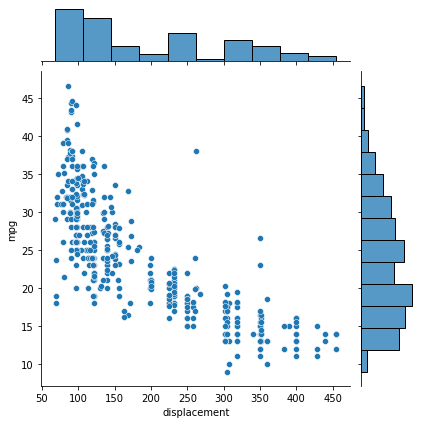

In [21]:
sns.jointplot(x='displacement', y='mpg', data=mpg)  # scatter + histogram
plt.show()

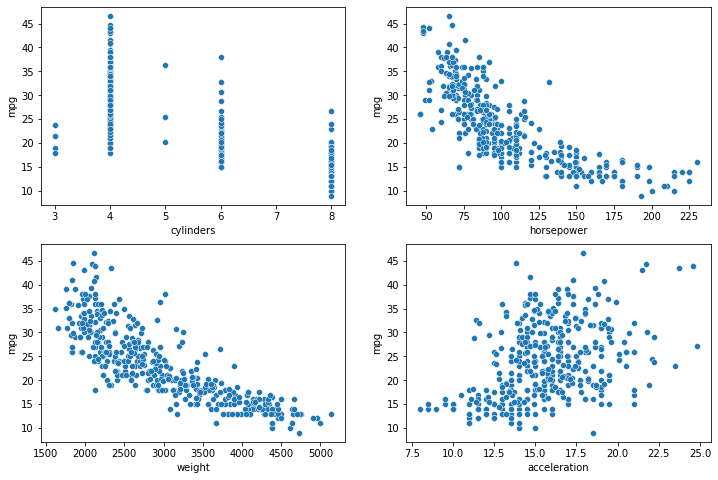

In [33]:
# 2x2 subplot 생성
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# 각 subplot에 scatter plot을 표현
sns.scatterplot(x='cylinders', y='mpg', data=mpg, ax=ax[0, 0])
sns.scatterplot(x='horsepower', y='mpg', data=mpg, ax=ax[0, 1])
sns.scatterplot(x='weight', y='mpg', data=mpg, ax=ax[1, 0])
sns.scatterplot(x='acceleration', y='mpg', data=mpg, ax=ax[1, 1])

# plot 보여주기
plt.show()

* cylinder별 mpg 평균 막대 그래프

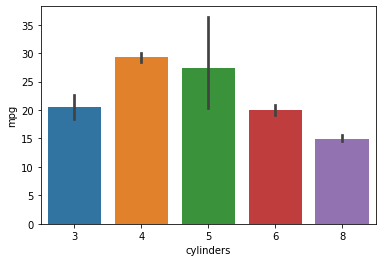

In [22]:
sns.barplot(x='cylinders', y='mpg', data=mpg)
plt.show()

In [46]:
cylinders = mpg['cylinders'].unique()
cylinders.sort()  # 배열을 정렬된 상태로 변환. return하지 않음.
print(cylinders)

[3 4 5 6 8]


In [43]:
mean_mpg = []  # cyliner 개수별 mpg의 평균을 저장할 리스트
for c in cylinders:
    mu = mpg[mpg['cylinders'] == c]['mpg'].mean()
    # print(c, mu)
    mean_mpg.append(mu)

s = pd.Series(data=mean_mpg, index=cylinders, name='mean_mpg')
s

3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mean_mpg, dtype: float64

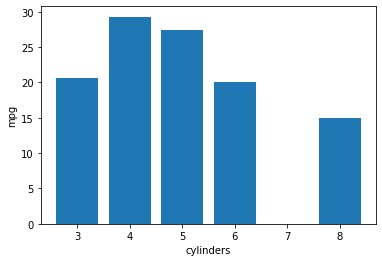

In [47]:
plt.bar(x=s.index, height=s.values)
plt.xlabel('cylinders')
plt.ylabel('mpg')
plt.show()

* cyliner별 mpg box plot

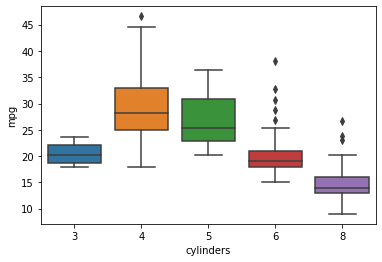

In [48]:
sns.boxplot(x='cylinders', y='mpg', data=mpg)
plt.show()

* origin별, cylinder별 mpg box plot

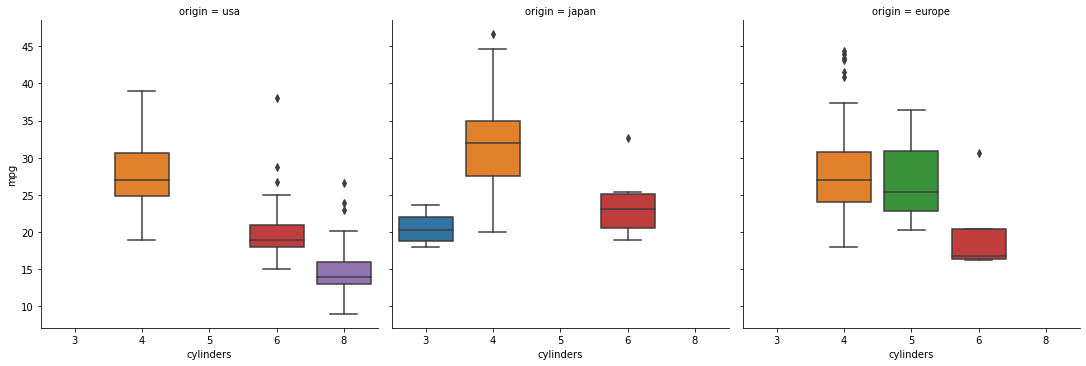

In [49]:
sns.catplot(data=mpg, x='cylinders', y='mpg', col='origin', kind='box')
plt.show()

* origin별, cylinder별 mpg 평균 막대 그래프

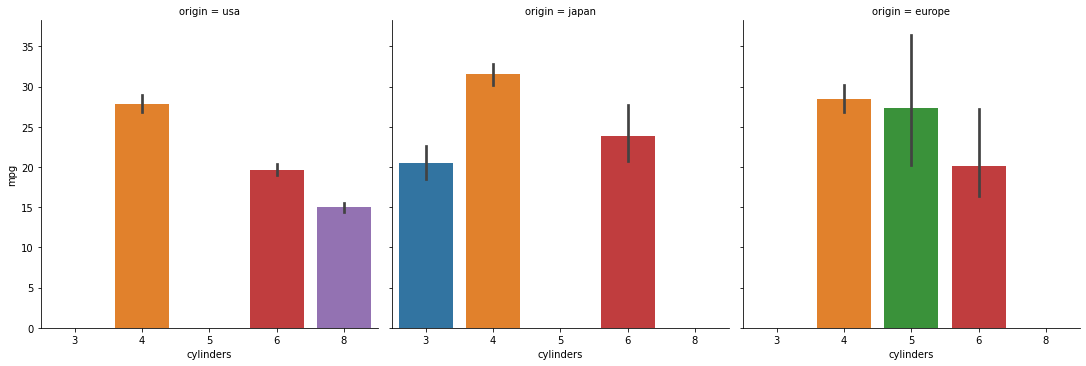

In [50]:
sns.catplot(data=mpg, x='cylinders', y='mpg', col='origin', kind='bar')
plt.show()

# iris 데이터 셋

* 데이터 셋 탐색
* 품종을 제외한 4개 변수의 boxplot
* 품종별로 Subplot의 컬럼을 구분하고, 숫자 타입 변수들의 boxplot을 각 품종별로 시각화
* petal_width ~ petal_length scatter plot. 품종별로 점의 색깔을 다르게.
* 모든 연속형 변수들 간의 상관 관계 scatter plot - Pair Plot

In [51]:
iris = sns.load_dataset('iris')

In [52]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [55]:
iris['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

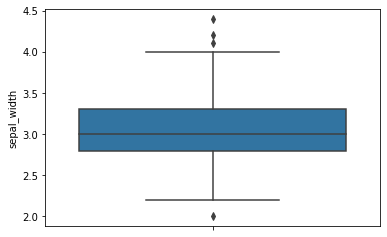

In [64]:
sns.boxplot(y='sepal_width', data=iris)
plt.show()

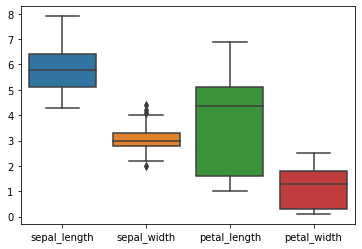

In [56]:
# 품종을 제외한 4개 변수의 boxplot
sns.boxplot(data=iris)  # 데이터프레임의 모든 숫자 타입 변수들의 boxplot을 그려줌.
plt.show()

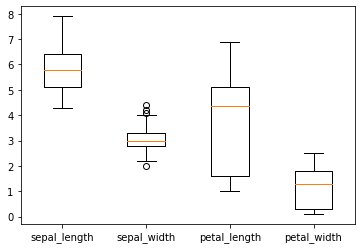

In [62]:
vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data = [iris[x] for x in vars]  # pd.Series를 원소로 갖는 리스트
plt.boxplot(x=data, labels=vars)
plt.show()

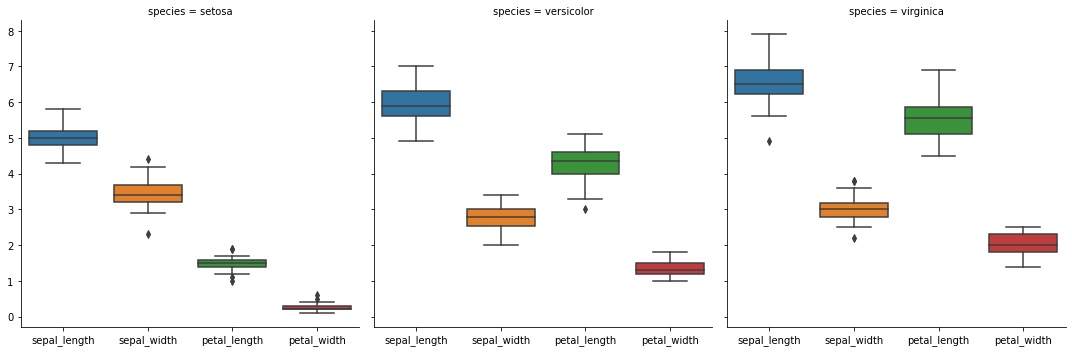

In [65]:
# 품종별로 Subplot의 컬럼을 구분하고, 숫자 타입 변수들의 boxplot을 각 품종별로 시각화
sns.catplot(data=iris, col='species', kind='box')
plt.show()

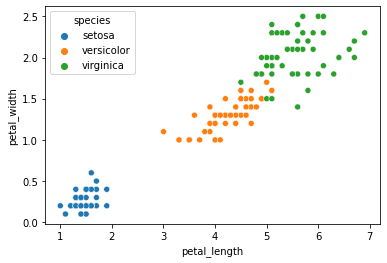

In [68]:
# petal_width ~ petal_length scatter plot. 품종별로 점의 색깔을 다르게.
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.show()

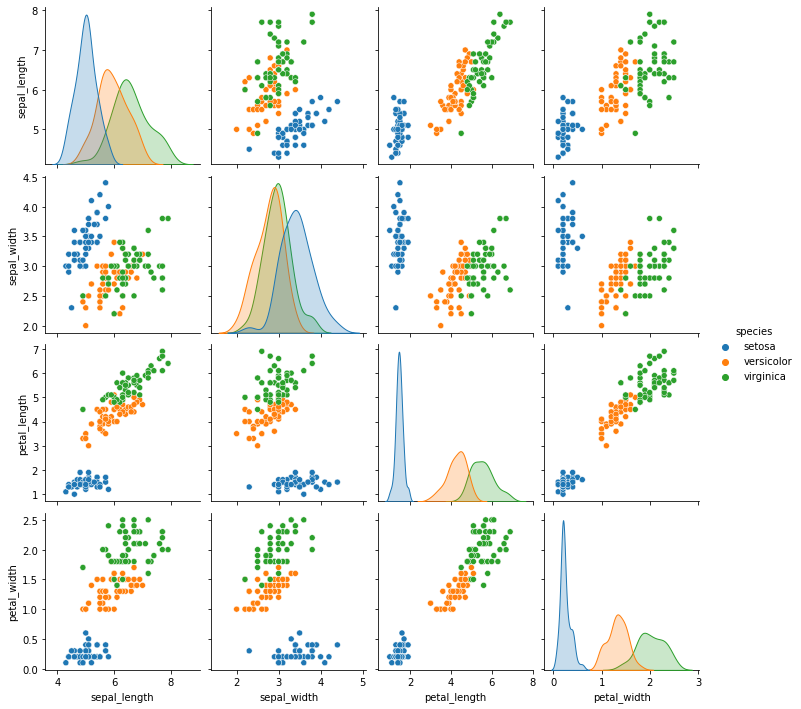

In [70]:
# 모든 연속형 변수들 간의 상관 관계 scatter plot - Pair Plot
sns.pairplot(data=iris, hue='species')
plt.show()

* mpg 데이터 프레임에서 mpg, cylinders, displacement, horsepower, weight의 pair plot

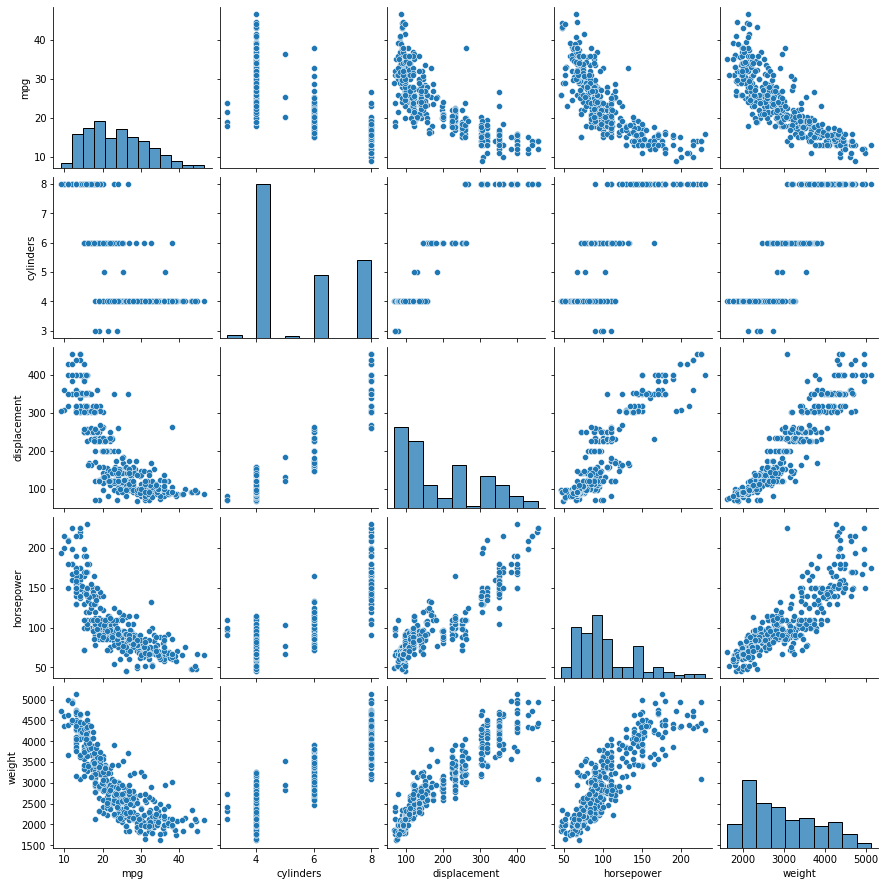

In [71]:
sns.pairplot(data=mpg, vars=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight'])
plt.show()